# In this notebook:
1. Calibrating the model parametes for each season in Connecticut

In [1]:
path_dir = "pycharm"
import os
os.chdir(path_dir)
import TAMU_model as model
os.chdir('../')
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import itertools
import pickle
from matplotlib import pyplot as plt
import datetime
from importlib import reload
from scipy import optimize
from matplotlib.ticker import FuncFormatter

In [2]:
model.varphi

14

# Calibration Func

In [3]:
def errorfunc(tpl,dates,data,state,season):
    # setting parameters
    beta = np.array([tpl[0],tpl[1],tpl[1],tpl[2],tpl[3]])
    phi = np.array([tpl[4]]) if tpl[4] > 1 else np.array([tpl[4] * 10**(4)])
    
    # Run model with given parameters
    model_result =  model.run_model(beta,phi,1e-4,1e-4,population_size=model.population_size[state],
                vaccination_coverage=model.vaccination_coverage['US'])
    
    # Resample the model's result by week
    model_result_weekly = model.model_infected_symp_cases(model_result,dates,season)
    
    # Calculated total symptomatic (high+low) per age group (adding as columns)
    for i,age_group in [(0,[0,5]),(1,[1,6]),(2,[2,7]),(3,[3,8]),(4,[4,9])]:
        model_result_weekly[model.A[i]+'_mdl'] = model_result_weekly.values[:,age_group].sum(axis=1)

    return np.log(model.MSE(data,model_result_weekly))

def print_stat_fit(fit_results_object):
    """The function gets optimization results object and print additional info about the optimization"""
    print('minimized value:',fit_results_object.fun)
    print('fitted parameters: Beta={0}, Phi={1}'.format(fit_results_object.x[:4],fit_results_object.x[-1] * 10 ** (4)))
    print('num of sampling the target function:',fit_results_object.nfev)

## Model reload

In [4]:
os.chdir(path_dir)
model = reload(model)
os.chdir('../')

# Model Calibration

## Loading data

In [5]:
#  getting season dates:
dates_19 = model.get_date_from_week(40,2018)
dates_18 = model.get_date_from_week(40,2017)
dates_17 = model.get_date_from_week(40,2016)
dates_16 = model.get_date_from_week(39,2015)
dates_15 = model.get_date_from_week(39,2014)

In [6]:
new_dates = []
for date in dates_16:
    if date.week == 53:
        continue
    else:
        new_dates.append(date)
dates_16 = new_dates

In [7]:
# loading seasonal data:
ct_data = model.get_state_data('Connecticut')
ct_19 = model.data_with_dates(ct_data[2019],dates_19)
ct_18 = model.data_with_dates(ct_data[2018],dates_18)
ct_17 = model.data_with_dates(ct_data[2017],dates_17)
ct_16 = model.data_with_dates(ct_data[2016],dates_16)
ct_15 = model.data_with_dates(ct_data[2015],dates_15)

## Manual calibration

MSE: 3.829553001151715e-07


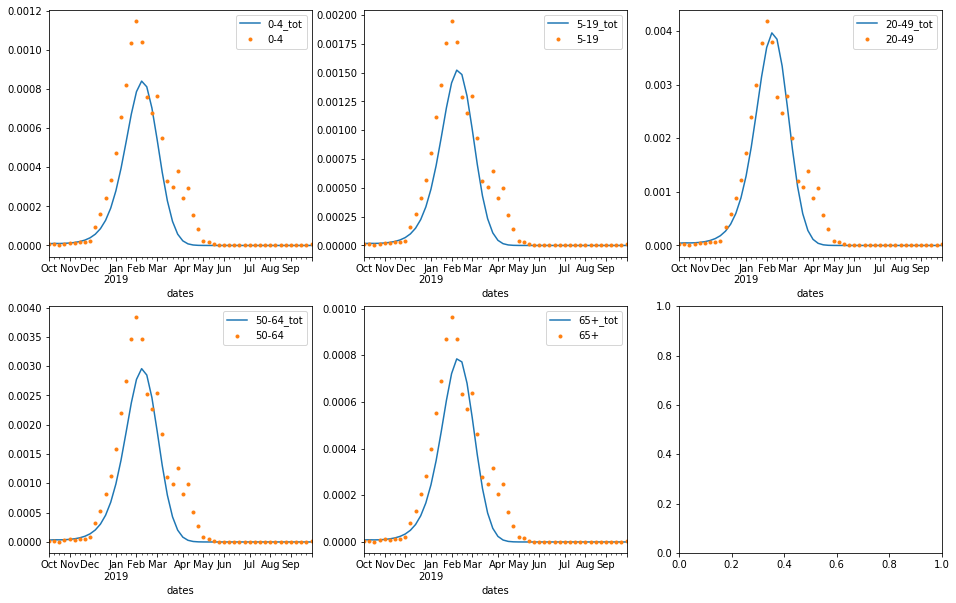

In [8]:
res_mdl = model.run_model([0.0027]+[0.00169]*2+[0.0027,0.002],0.0813*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Connecticut'],
                vaccination_coverage=model.vaccination_coverage['US'])




# plotting the data and model
calibrate_mdl = model.model_infected_symp_cases(res_mdl,dates_19,2019)
model.plot_calibrated_model(ct_19,calibrate_mdl)

## Calibration by season

### 2015

minimized value: -15.954079775577961
fitted parameters: Beta=[0.00314757 0.00155115 0.00291743 0.00203014], Phi=82.26815087717131
num of sampling the target function: 222
MSE: 1.1782330198415902e-07


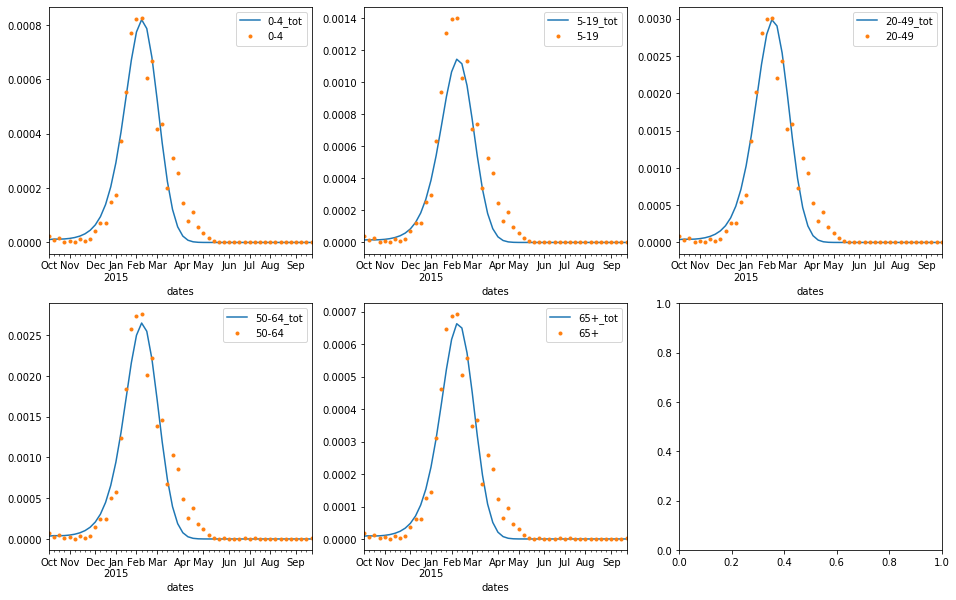

In [9]:
#fitting season 2015:
# Model Fitting
p0=(0.0027,0.00168,0.0026,0.0019,0.082) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.003,0.017))# boundries for variables
res_fit_15= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=( dates_15,ct_15,'Connecticut',2015)
                           ,options={'maxiter':1000})

fitted_params_15 = res_fit_15.x

# run the fitted model:
fitted_beta_15 = np.array([fitted_params_15[0],fitted_params_15[1],fitted_params_15[1],fitted_params_15[2],
                           fitted_params_15[3]])
fitted_phi_15 = fitted_params_15[4]
res_mdl_15 = model.run_model(fitted_beta_15,fitted_phi_15*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Connecticut'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_15)
calibrate_mdl_15 = model.model_infected_symp_cases(res_mdl_15,dates_15,2015)
model.plot_calibrated_model(ct_15,calibrate_mdl_15)

### 2016

minimized value: -16.252149111226657
fitted parameters: Beta=[0.00318764 0.00158836 0.00294485 0.00210428], Phi=100.72924946565998
num of sampling the target function: 267
MSE: 8.745433100335623e-08


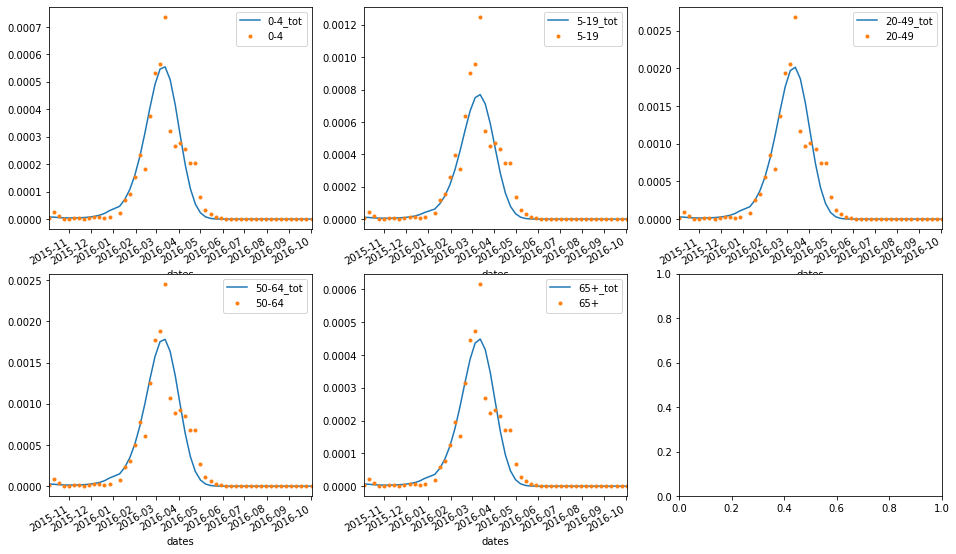

In [10]:
#fitting season 2016:
# Model Fitting
p0=(0.0027,0.00168,0.0026,0.0019,0.0825) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.004,0.017))# boundries for variables
res_fit_16= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_16,ct_16,'Connecticut',2016)
                           ,options={'maxiter':2000})

fitted_params_16 = res_fit_16.x

# run the fitted model:
fitted_beta_16 = np.array([fitted_params_16[0],fitted_params_16[1],fitted_params_16[1],fitted_params_16[2],
                           fitted_params_16[3]])
fitted_phi_16 = fitted_params_16[4]
res_mdl_16 = model.run_model(fitted_beta_16,fitted_phi_16*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Connecticut'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_16)
calibrate_mdl_16 = model.model_infected_symp_cases(res_mdl_16,dates_16,2016)
model.plot_calibrated_model(ct_16,calibrate_mdl_16)

### 2017

minimized value: -15.611703758290743
fitted parameters: Beta=[0.00316544 0.00153947 0.00288129 0.00202491], Phi=85.53937326054378
num of sampling the target function: 226
MSE: 1.6592934722950682e-07


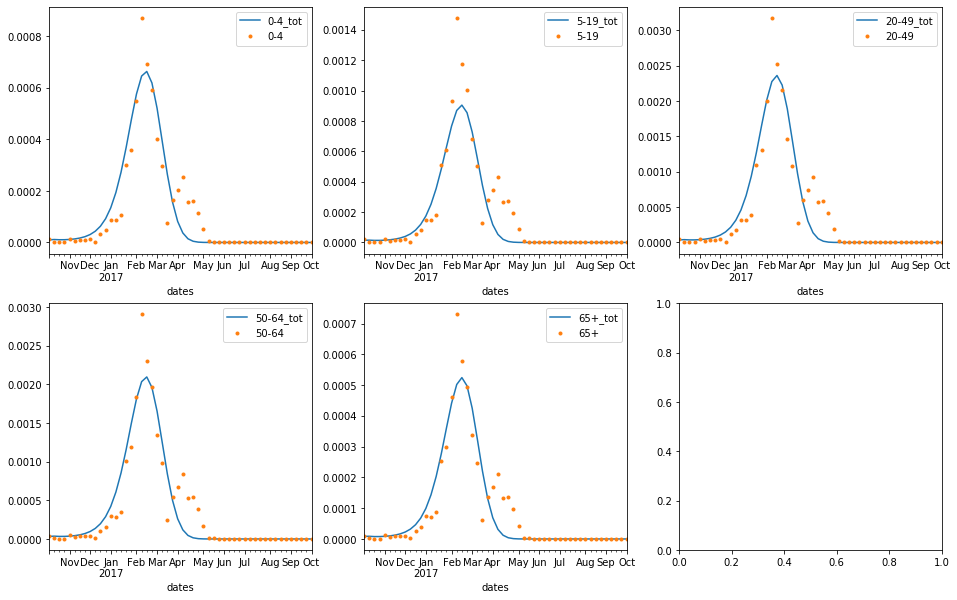

In [11]:
#fitting season 2017:
# Model Fitting
p0=(0.0027,0.00165,0.0026,0.0019,0.0815) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.005,0.017))# boundries for variables
res_fit_17= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_17,ct_17,'Connecticut',2017)
                           ,options={'maxiter':3000})

fitted_params_17 = res_fit_17.x

# run the fitted model:
fitted_beta_17 = np.array([fitted_params_17[0],fitted_params_17[1],fitted_params_17[1],fitted_params_17[2],
                           fitted_params_17[3]])
fitted_phi_17 = fitted_params_17[4]
res_mdl_17 = model.run_model(fitted_beta_17,fitted_phi_17*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Connecticut'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_17)
calibrate_mdl_17 = model.model_infected_symp_cases(res_mdl_17,dates_17,2017)
model.plot_calibrated_model(ct_17,calibrate_mdl_17)

### 2018

C:\Users\matan\Documents\Matan\TAU\MA\TAMU project\pycharm\TAMU_model.py:152: RuntimeWarning: overflow encountered in multiply
  i_day[:, 0] = S[-1] * lambda_t * (1 - f)
C:\Users\matan\Documents\Matan\TAU\MA\TAMU project\pycharm\TAMU_model.py:160: RuntimeWarning: overflow encountered in multiply
  a_day[:, 0] = S[-1] * lambda_t * f
C:\Users\matan\Documents\Matan\TAU\MA\TAMU project\pycharm\TAMU_model.py:142: RuntimeWarning: invalid value encountered in multiply
  ((a[-1][0:5, :] + a[-1][5:10, :]) * (VL['asymptomatic'][:varphi])).sum(axis=1))) * (
C:\Users\matan\Anaconda3\lib\site-packages\numpy\core\_methods.py:38: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\matan\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


minimized value: -14.719852736234046
fitted parameters: Beta=[0.00362671 0.0015802  0.00312045 0.00199013], Phi=85.85337112635385
num of sampling the target function: 238
MSE: 4.0480808909361264e-07


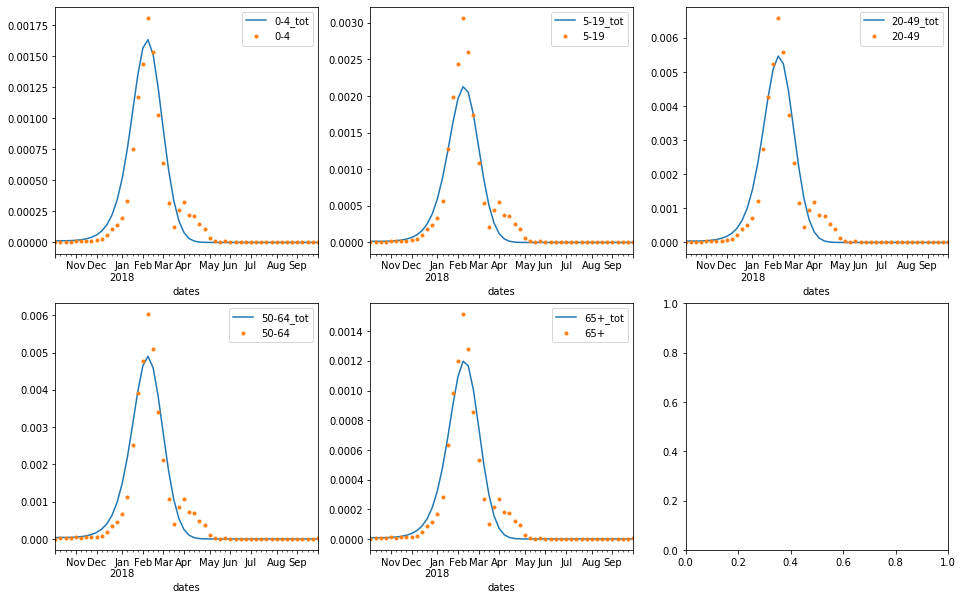

In [12]:
#fitting season 2018:
# Model Fitting
p0=(0.0028,0.00175,0.0028,0.002,0.0815) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.004,0.017))# boundries for variables
res_fit_18= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_18,ct_18,'Connecticut',2018)
                           ,options={'maxiter':1000})

fitted_params_18 = res_fit_18.x

# run the fitted model:
fitted_beta_18 = np.array([fitted_params_18[0],fitted_params_18[1],fitted_params_18[1],fitted_params_18[2],
                        fitted_params_18[3]])
fitted_phi_18 = fitted_params_18[4]
res_mdl_18 = model.run_model(fitted_beta_18,fitted_phi_18*10**(4),1e-4,1e-4,
                             population_size=model.population_size['Connecticut'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_18)
calibrate_mdl_18 = model.model_infected_symp_cases(res_mdl_18,dates_18,2018)
model.plot_calibrated_model(ct_18,calibrate_mdl_18)

### 2019

minimized value: -15.069743268424991
fitted parameters: Beta=[0.00315928 0.00157648 0.00299786 0.00204513], Phi=80.84879259728258
num of sampling the target function: 204
MSE: 2.85294667878979e-07


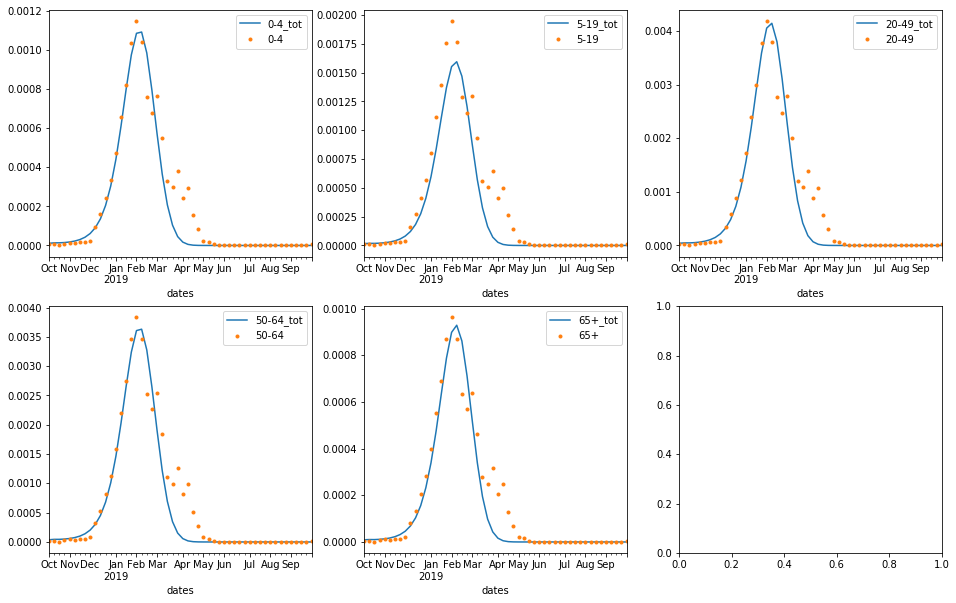

In [13]:
#fitting season 2019:
# Model Fitting
p0=(0.0027,0.00169,0.0027,0.002,0.0813) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.004,0.017))# boundries for variables
res_fit_19= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_19,ct_19,'Connecticut',2019)
                           ,options={'maxiter':1000})

fitted_params_19 = res_fit_19.x

# run the fitted model:
fitted_beta_19 = np.array([fitted_params_19[0],fitted_params_19[1],fitted_params_19[1],fitted_params_19[2],
                        fitted_params_19[3]])
fitted_phi_19 = fitted_params_19[4]
res_mdl_19 = model.run_model(fitted_beta_19,fitted_phi_19*10**(4),1e-4,1e-4,
                             population_size=model.population_size['Connecticut'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_19)
calibrate_mdl_19 = model.model_infected_symp_cases(res_mdl_19,dates_19,2019)
model.plot_calibrated_model(ct_19,calibrate_mdl_19)

# Saving calibration data

In [21]:
# Saving fitted parameters for CT
CT_fitted_params = {}
CT_fitted_params['2015'] = {'beta': fitted_beta_15, 'phi': fitted_phi_15}
CT_fitted_params['2016'] = {'beta': fitted_beta_16, 'phi': fitted_phi_16}
CT_fitted_params['2017'] = {'beta': fitted_beta_17, 'phi': fitted_phi_17}
CT_fitted_params['2018'] = {'beta': fitted_beta_18, 'phi': fitted_phi_18}
CT_fitted_params['2019'] = {'beta': fitted_beta_19, 'phi': fitted_phi_19}

with open('./model_data/CT_fitted_parameters.pickle', 'wb') as handle:
    pickle.dump(CT_fitted_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [22]:
# Getting the attack rate for each age group, model and data
df_model_AR_ct = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

mdl_AR_15 = model.model_attack_rate(calibrate_mdl_15,'Connecticut')
mdl_AR_15['season'] = 2015

mdl_AR_16 = model.model_attack_rate(calibrate_mdl_16,'Connecticut')
mdl_AR_16['season'] = 2016

mdl_AR_17 = model.model_attack_rate(calibrate_mdl_17,'Connecticut')
mdl_AR_17['season'] = 2017

mdl_AR_18 = model.model_attack_rate(calibrate_mdl_18,'Connecticut')
mdl_AR_18['season'] = 2018

mdl_AR_19 = model.model_attack_rate(calibrate_mdl_19,'Connecticut')
mdl_AR_19['season'] = 2019

for mdl_AR in [mdl_AR_15,mdl_AR_16,mdl_AR_17,mdl_AR_18,mdl_AR_19]:
    df_model_AR_ct = df_model_AR_ct.append(mdl_AR, ignore_index=True)

with open('./model_data/CT_model_attackrate.pickle', 'wb') as handle:
    pickle.dump(df_model_AR_ct, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [23]:
# Getting the attack rate for each age group, model and data
df_data_AR_ct = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

dt_AR_15 = model.get_data_attack_rate(ct_15,'Connecticut')
dt_AR_15['season'] = 2015

dt_AR_16 = model.get_data_attack_rate(ct_16,'Connecticut')
dt_AR_16['season'] = 2016

dt_AR_17 = model.get_data_attack_rate(ct_17,'Connecticut')
dt_AR_17['season'] = 2017

dt_AR_18 = model.get_data_attack_rate(ct_18,'Connecticut')
dt_AR_18['season'] = 2018

dt_AR_19 = model.get_data_attack_rate(ct_19,'Connecticut')
dt_AR_19['season'] = 2019

for dt_AR in [dt_AR_15,dt_AR_16,dt_AR_17,dt_AR_18,dt_AR_19]:
    df_data_AR_ct = df_data_AR_ct.append(dt_AR, ignore_index=True)

with open('./model_data/CT_data_attackrate.pickle', 'wb') as handle:
    pickle.dump(df_data_AR_ct, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [24]:
# Proportion Model
# Getting the attack rate for each age group, model and data
df_model_Pr_ct = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

mdl_Pr_15 = model.model_proportion(calibrate_mdl_15)
mdl_Pr_15['season'] = 2015

mdl_Pr_16 = model.model_proportion(calibrate_mdl_16)
mdl_Pr_16['season'] = 2016

mdl_Pr_17 = model.model_proportion(calibrate_mdl_17)
mdl_Pr_17['season'] = 2017

mdl_Pr_18 = model.model_proportion(calibrate_mdl_18)
mdl_Pr_18['season'] = 2018

mdl_Pr_19 = model.model_proportion(calibrate_mdl_19)
mdl_Pr_19['season'] = 2019

for mdl_Pr in [mdl_Pr_15,mdl_Pr_16,mdl_Pr_17,mdl_Pr_18,mdl_Pr_19]:
    df_model_Pr_ct = df_model_Pr_ct.append(mdl_Pr, ignore_index=True)

with open('./model_data/CT_model_proportion.pickle', 'wb') as handle:
    pickle.dump(df_model_Pr_ct, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
# Proportion Data

df_data_PR_ct = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

dt_Pr_15 = model.get_data_proportion(ct_15)
dt_Pr_15['season'] = 2015

dt_Pr_16 = model.get_data_proportion(ct_16)
dt_Pr_16['season'] = 2016

dt_Pr_17 = model.get_data_proportion(ct_17)
dt_Pr_17['season'] = 2017

dt_Pr_18 = model.get_data_proportion(ct_18)
dt_Pr_18['season'] = 2018

dt_Pr_19 = model.get_data_proportion(ct_19)
dt_Pr_19['season'] = 2019

for dt_Pr in [dt_Pr_15,dt_Pr_16,dt_Pr_17,dt_Pr_18,dt_Pr_19]:
    df_data_PR_ct = df_data_PR_ct.append(dt_Pr, ignore_index=True)

with open('./model_data/CT_data_proportion.pickle', 'wb') as handle:
    pickle.dump(df_data_PR_ct, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [26]:
# Getting data for fitting figure:
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_16)
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_17)
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_18)
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_19)

with open('./model_data/CT_mdl_fitting_res.pickle', 'wb') as handle:
    pickle.dump(calibrate_mdl_15, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [27]:
# Getting data for fitting figure:
ct_15 = ct_15.append(ct_16)
ct_15 = ct_15.append(ct_17)
ct_15 = ct_15.append(ct_18)
ct_15 = ct_15.append(ct_19)

with open('./model_data/CT_data_fitting_res.pickle', 'wb') as handle:
    pickle.dump(ct_15, handle, protocol=pickle.HIGHEST_PROTOCOL)